## Summary:
- Statistics
- Types of Statistics
- Descriptive Statistics: Measure of Central Tendency, Measure of Dispersion, Data Distribution and Shape
- Why Separating Numerical and Categorical Features is Important
- Using US Health Insurance Dataset for Practicing Python Implementation for Statistics
- I. Measure of Central Tendency: Determine the Overall Stats of the Data (Numerical Features Only) Using Describe Method
- 1) Measure of Central Tendency (Mean, Median, Mode) for Numerical Features Only: How Measures of Central Tendency Help Us
- Data Encoding for Categorical Features Before Applying Statistics on the Categorical Feature
- 2) Measure of Central Tendency (Mode, Frequency Count) for Categorical Features
- II. Measure of Dispersion: How Variance and Standard Deviation Help in EDA - Understand Data Consistency, Spot Potential Outliers, Compare Features, Determine Distribution Spread
- 1) Standard Deviation and Variance for Numerical Columns
- A) To Understand Data Consistency Using Standard Deviation, Mean and Relative Standard Deviation: How Data Consistency Matters for EDA
- B) To Spot Potential Outliers Using Standard Deviation, Mean, and Relative Standard Deviation
- B.1) Box Plot for Confirming the Possibility of Outliers
- B.2) Histogram for Confirming the Possibility of Outliers
- 1) Mode and Frequency Distribution for Categorical Features of the Data
- A) To Understand Data Consistency Using Mode and Frequency Distribution for Categorical Data
- B) To Spot Potential Outliers Using Frequency Distribution for Categorical Features
- Bar Chart: Confirming the Potential Outliers or Class Imbalance in the Categorical Features Visually
- How to Interpret Frequency Distribution and Mode for Data Consistency
- How Interpretation of Measure of Dispersion for Data Consistency for Numerical Features is Different from that of Categorical Features
- III. Data Distribution and Shape for Numerical (Quantitative) Features Using Histograms and Box Plot
- Data Distribution and Shape for Categorical Features: Bar Plots and How Bar Plots Help

# Statistics
- is a branch of mathematics that deals with collecting, organizing, analyzing, interpreting, and presenting data.

- In simple words, it helps us make sense of data by summarizing it and finding patterns or insights.

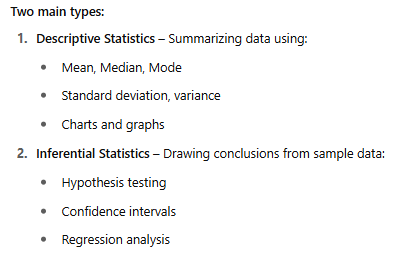

## Descriptive Stats : 
Think of it as the first step in data analysis — before predicting or concluding anything, we explore the data using:

Central Tendency (Where is the center of the data?)

Dispersion (Spread) (How spread out is the data?)

Data Distribution (How does the data look visually?)



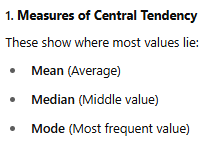 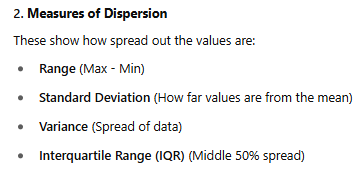 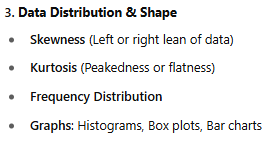lly?)

# Seperating the Numerical & Categorical Features

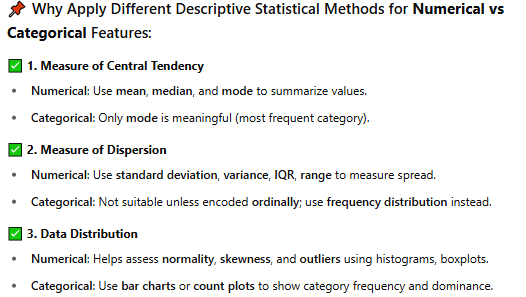

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# Load the CSV file into a DataFrame
df = pd.read_csv('insurance.csv')

In [132]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [134]:
## Separate the Numerical Columns and Categorical Columns 
# Replace 'region' with 'region_type' in the categorical columns list
categorical_col = ['sex', 'smoker', 'region']
numeric_col = ['age','bmi','children', 'charges']

In [22]:
# for columns in df.columns:
#     if df[columns].dtypes == "float64" or df[columns].dtypes == "int64":
#         numeric_col.append(columns)
#     else:
#         categorical_col.append(columns)

# print(numeric_col)
# print(categorical_col)
        
print(categorical_col)     
print(numeric_col)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


# I) Measure of  Central Tendency
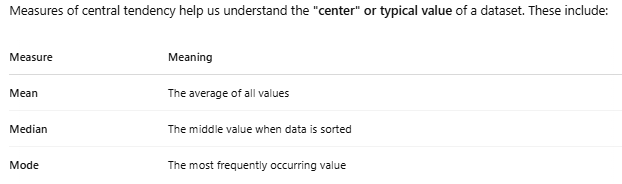

In [25]:
#### Preview of the data 
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Determine the overall stats of the data (only numerical feature) by describe method
The describe() method in pandas is a quick and powerful way to summarize the central tendency, spread, and shape of numerical features. Here's what it provides and how each value helps in understanding the data:

- Count:
    - What it shows: Number of non-null (non-missing) entries in each numerical column.
    - Why it matters: Helps identify if there are any missing values in the data. Be cautious: It is sensitive to outliers.

- Mean (Average):
    - What it shows: The central value of the data (sum of values ÷ count).
    - Why it matters: Represents the central tendency of the feature. Useful to summarize data with a single value.

- Standard Deviation (std):
    - What it shows: How much the values in a column deviate from the mean.
    - Why it matters: Measures the consistency or spread of the data.
        - Low std → Values are tightly clustered (high consistency)
        - High std → Values are more spread out (possible outliers)

- Minimum (min):
    - What it shows: The smallest value in the column.
    - Why it matters: Helps detect lower outliers and understand the data range.

- Maximum (max):
    - What it shows: The highest value in the column.
    - Why it matters: Helps detect upper outliers and understand the data range.

- 50th Percentile (50%) – Median:
    - What it shows: Middle value when data is sorted.
    - Why it matters: More robust than mean in the presence of outliers. Shows central tendency for skewed data.
- 75th Percentile (75%) – Q3
    - What it shows: 75% of the data falls below this value.
    - Why it matters: Used with Q1 to calculate IQR (Q3 - Q1). Helpful to find spread and detect outliers.

In [28]:
df.describe() # Gies overll stats of the numerical Columns of the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 1) Measure of central Tendency (mean, median, mode) for Numerical Features only:
- Numerical features: For quantitative data, we can apply mean and median to understand the central tendency and spread.

#### 🔹 How Measures of Central Tendency Help Us:
Mean, Median, and Mode summarize the entire dataset using a single representative value, making it easier to understand the overall distribution and behavior of the data.

- They are highly useful for data imputation, especially when there are:

    - Missing (null) values

    - Imbalanced distributions

    - Outliers (where median is preferred over mean)



In [139]:
# Loop through each numeric column and calculate mean, median, and mode
for col in numeric_col:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]  # mode() returns a Series, we take the first mode

    print(f"Column: {col}")
    print(f"  Mean   : {mean_val}")
    print(f"  Median : {median_val}")
    print(f"  Mode   : {mode_val}")
    print("-" * 30)


Column: age
  Mean   : 39.20702541106129
  Median : 39.0
  Mode   : 18
------------------------------
Column: bmi
  Mean   : 30.66339686098655
  Median : 30.4
  Mode   : 32.3
------------------------------
Column: children
  Mean   : 1.0949177877429
  Median : 1.0
  Mode   : 0
------------------------------
Column: charges
  Mean   : 13270.422265141257
  Median : 9382.033
  Mode   : 1639.5631
------------------------------


# Data Encoding for categorical features 

In [142]:
# Perform data encoding for the the categorical features

# Determine unique values in each categorical feature
for col in categorical_col:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_vals)
    print("-" * 50)


Unique values in 'sex':
['female' 'male']
--------------------------------------------------
Unique values in 'smoker':
['yes' 'no']
--------------------------------------------------
Unique values in 'region':
['southwest' 'southeast' 'northwest' 'northeast']
--------------------------------------------------


In [144]:
# Encoding 'sex' column: female = 1, male = 0
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

# Encoding 'smoker' column: yes = 1, no = 0
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [146]:
# Create a mapping dictionary
region_mapping = {
    'southwest': 1,
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
}

# Apply the mapping to create a new column 'region_type'
df['region'] = df['region'].map(region_mapping)

# Drop the original 'region' column if you no longer need it
# df.drop('region', axis=1, inplace=True)



In [148]:
# Display the updated DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [150]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [152]:
# # Replace 'region' with 'region_type' in the categorical columns list
# categorical_col = ['sex', 'smoker', 'region_type']
# numerical_col = ['age','bmi','children', 'charges']

### 2) Measure of Central tendency (Mode, Frequency Count) for Categorical features.
- Why NOT Use Mean/Median?
- Label Encoding, One-Hot Encoding, etc., assign numerical values to categories — but those numbers don’t carry mathematical meaning.
- So computing mean or median of encoded values is misleading because:
    - The numbers are arbitrary.
    - There is no order or scale implied between them.

In [220]:
for col in categorical_col:
    if col in df.columns:  # Check if column still exists (e.g., 'region' was dropped)
        mode_val = df[col].mode()[0]
        count = df[col].value_counts()[mode_val]
        print(f"{col}: Mode = '{mode_val}', Count = {count}")

sex: Mode = '0', Count = 676
smoker: Mode = '0', Count = 1064
region: Mode = '2', Count = 364


# II ) Measure of Dispersion 
- Measures of Dispersion (also called Measures of Variability or Spread) describe how much the data values vary or spread out from the central value (mean/median).

- While measures of central tendency (like mean, median, mode) tell us where the center of the data lies, the measures of dispersion tell us how spread out or clustered the data is.

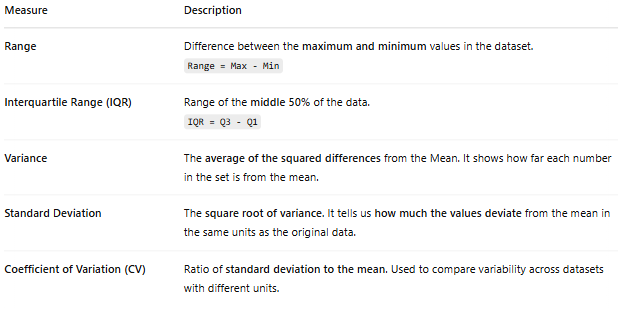

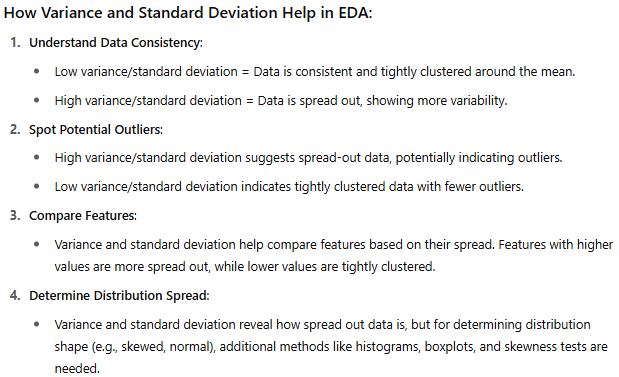


## 1) Standard deviation and Variance for Numerical Columns

In [225]:
### Understand the Data Consistency:
# Determine the SD for each numerical column 
stds = df[numeric_col].std()


In [227]:
# Calculate mean and standard deviation for each numerical column
means = df[numeric_col].mean()

In [229]:
# Combine into a single DataFrame for better readability
consistency_df = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': stds,
    'Relative SD': stds / means  # Coefficient of Variation (Optional)
})

# consistency_df

In [231]:
# Display summary
print("Data Consistency Summary (Mean and Standard Deviation):")
consistency_df

Data Consistency Summary (Mean and Standard Deviation):


,Mean,Standard Deviation,Relative SD
age,39.207025,14.049960,0.358353
bmi,30.663397,6.098187,0.198875
children,1.094918,1.205493,1.100989
charges,13270.422265,12110.011237,0.912557


#### A) To Understand Data Consistency Using Stadard Deviation, Mean and Relative Standard Deviation 

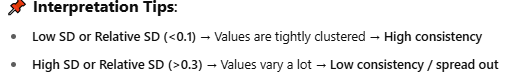

##### Note: 
Low or high standard deviation (SD) or relative SD can hint at outliers, but they do not confirm outliers by themselves.



#### How Does Data Consistency matters for a data/Data Consistency in EDA?
- High Consistency (Low Std Dev):

    - Values are close to the mean.

    - Data is stable and predictable.

    - Useful for clean modeling.
 
- Low Consistency (High Std Dev):

    - Values are widely spread.

    - Indicates high variability or outliers.

    - May need scaling, transformation, or outlier handling.


#### B) To Spot Potential Outliers Using Standard Deviation, Mean, and Relative Standard Deviation 
- Low Consitentency can indicate possibility of Outliersin the given feature but not guranteed. You can further plot box plots to confirm if there are outliers in the feature.

In [67]:
# Create an empty list to store columns with potential outliers
columns_with_outliers = []


In [69]:
# Loop through each row in the consistency_df
for col in consistency_df.index:
    mean = consistency_df.loc[col, 'Mean']
    std = consistency_df.loc[col, 'Standard Deviation']
    
    # Calculate the threshold bounds
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    # Check if any values in the column fall outside the bounds
    if not df[(df[col] < lower_bound) | (df[col] > upper_bound)].empty:
        columns_with_outliers.append(col)


In [71]:
# Print the columns with potential outliers
print("Columns with potential outliers (based on ±3 SD):")
print(columns_with_outliers)

Columns with potential outliers (based on ±3 SD):
['bmi', 'children', 'charges']


#### B.1)  Box Plot for confirming the Posibility of outliers
- Relating the speread of the BOX Plot with the posibillities of Outliers

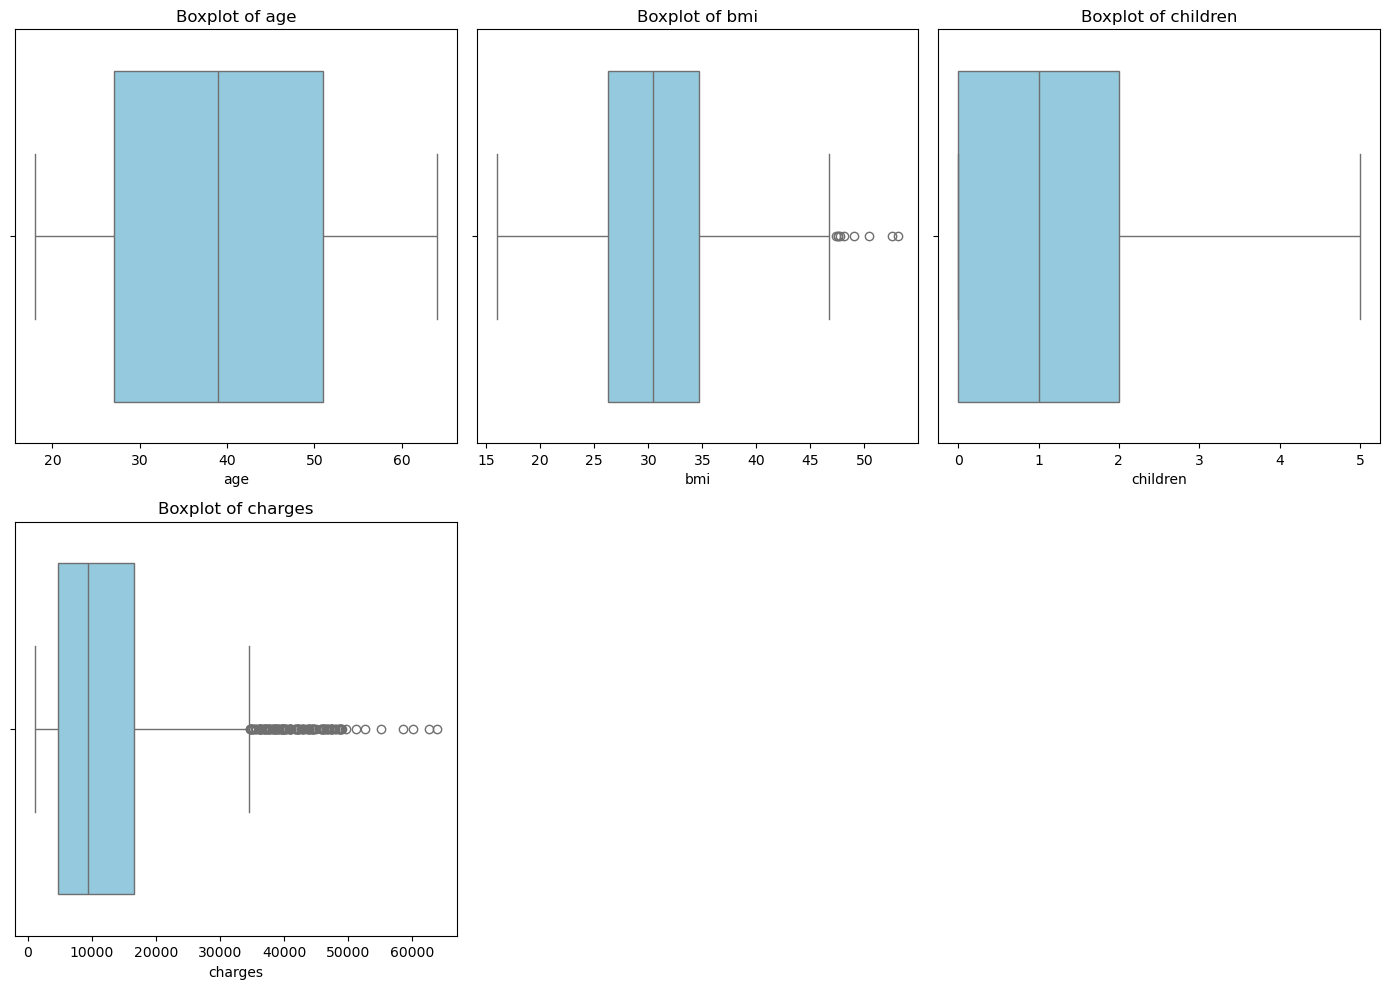

In [74]:
# Set up the plotting area
plt.figure(figsize=(14, 10))

# Plot each numerical feature in a subplot
for i, col in enumerate(numeric_col, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

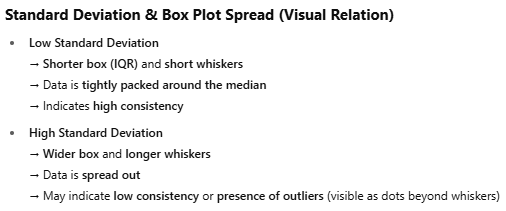

### B.2) Histogram For confiroming the Possibilities of Outliers
- Realting the spread of the bars with the possibilities of the Outliers.

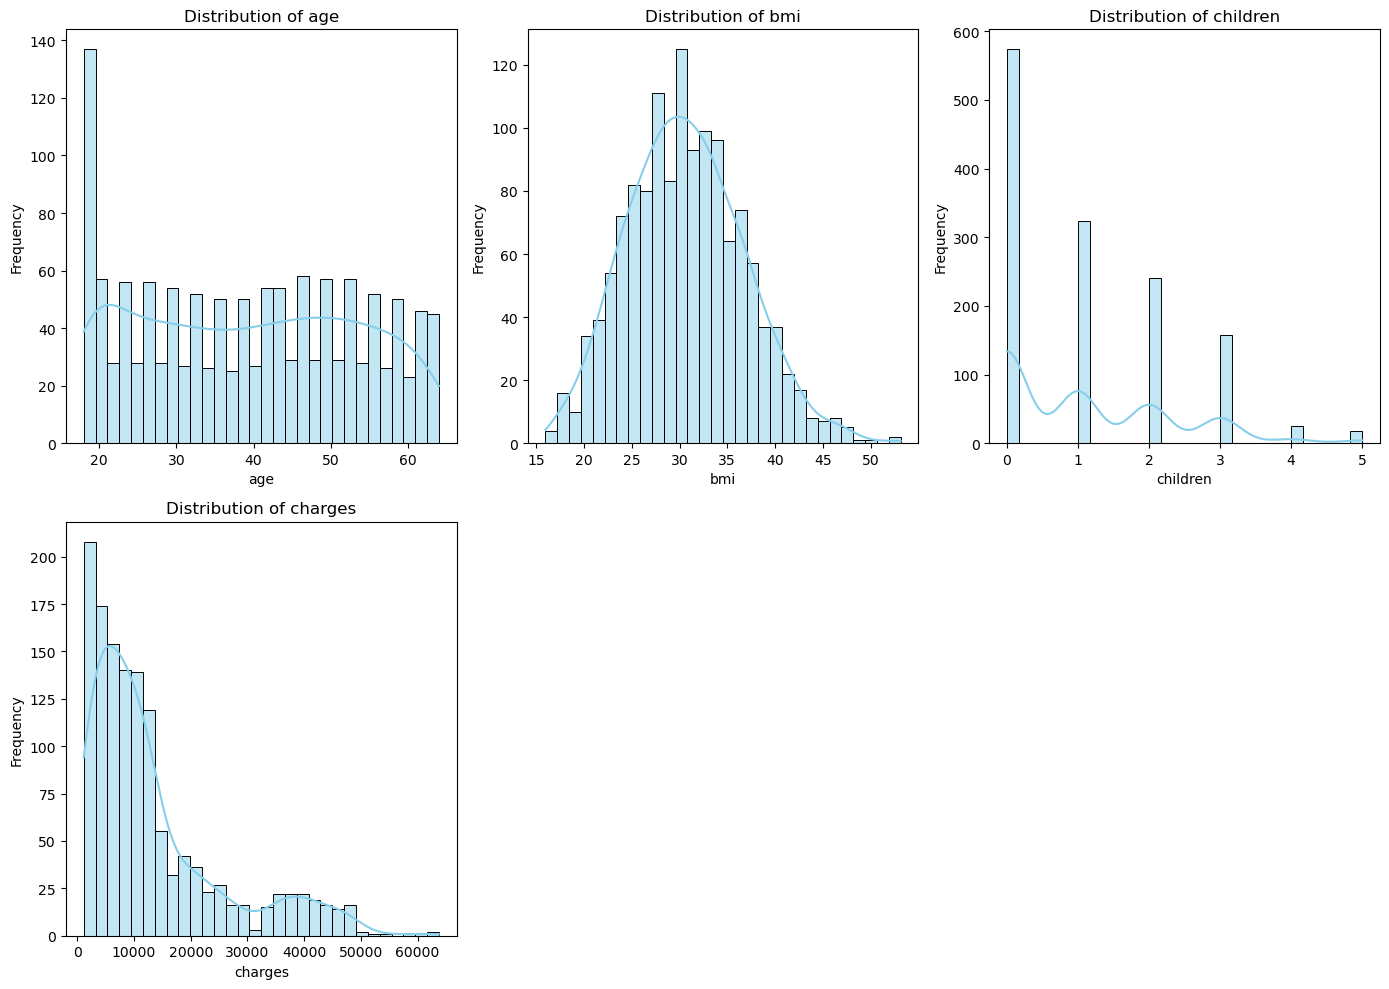

In [78]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through each numeric column
for i, col in enumerate(numeric_col, 1):
    plt.subplot(2, 3, i)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


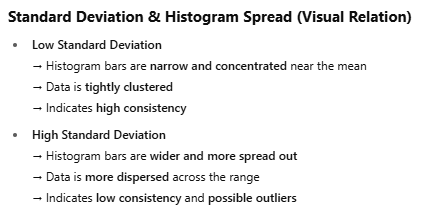

## 1) Mode, and Frequency Distribution for Categorical Features of the data


###### Note: When to use Measure of Dispersion on Categorical features:

- Unless and until categorical features are encoded using ordinal encoding or the encoded values represent a meaningful order, we should not apply measures of dispersion (like variance or standard deviation) to them.
###### Why?
Nominal features (e.g., gender, region) have no inherent order → the numeric codes are just labels.

Ordinal features (e.g., education level, customer satisfaction) do have an order, so dispersion can sometimes make sense.

Measures like variance, standard deviation, and skewness assume numeric distances, which don't exist in nominal data.

###### In Short:
- Use dispersion measures for: numeric & ordinal data (if encoding reflects order).

- Avoid dispersion for: nominal data (even if encoded numerically).



In [190]:
for col in categorical_col:
    if col in df.columns:
        print(f"\nColumn: {col}")
        
        # Display the mode
        mode_val = df[col].mode()[0]
        print(f"Mode: {mode_val}")
        
        # Display value counts for all categories
        print("Frequency Distribution:")
        print(df[col].value_counts())



Column: sex
Mode: 0
Frequency Distribution:
sex
0    676
1    662
Name: count, dtype: int64

Column: smoker
Mode: 0
Frequency Distribution:
smoker
0    1064
1     274
Name: count, dtype: int64

Column: region
Mode: 2
Frequency Distribution:
region
2    364
1    325
3    325
4    324
Name: count, dtype: int64


### A.) To Undeerstand Data Consistency using mode and frequency distribution for categorical data

- Mode and Standard Deviation (or variance) help assess data consistency in categorical features:
    - Mode:
        - Shows the most frequent category.
        - If one category dominates, the data is less diverse → indicates skewness in classes.
    - Standard Deviation (or Variance):
        - Measures how spread out the category frequencies are.
        -  Low variance = most values fall into 1 or 2 classes (less consistent).
        -  High variance = more even spread (more consistent representation of categories).

### B) To Spot potential Outliers using Frequency Distribution for Categorica features
- Rare categories can often be identified by analyzing the frequency distribution of each categorical feature.

- Any category that occurs with a very low frequency (e.g., less than 5%) may be considered a rare category or a potential outlier.

- While such categories may not always be true outliers, they can indicate:

    - Data entry errors

    - Infrequent but valid classes

    - Categories with low predictive power

- Even if not outliers, frequency distribution is an effective way to detect class imbalance across categories.

In [201]:
for col in categorical_col:
    print(f"\n--- {col} ---")
    freq = df[col].value_counts(normalize=True) * 100  # percentage
    print(freq)



--- sex ---
sex
0    50.523169
1    49.476831
Name: proportion, dtype: float64

--- smoker ---
smoker
0    79.521674
1    20.478326
Name: proportion, dtype: float64

--- region ---
region
2    27.204783
1    24.289985
3    24.289985
4    24.215247
Name: proportion, dtype: float64


#### Bar Chart :Confirming the Potential Outliers or Class Imabalnce in the Categorical features visually

C:\Users\bhosa\AppData\Local\Temp\ipykernel_3140\2887610073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
C:\Users\bhosa\AppData\Local\Temp\ipykernel_3140\2887610073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
C:\Users\bhosa\AppData\Local\Temp\ipykernel_3140\2887610073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


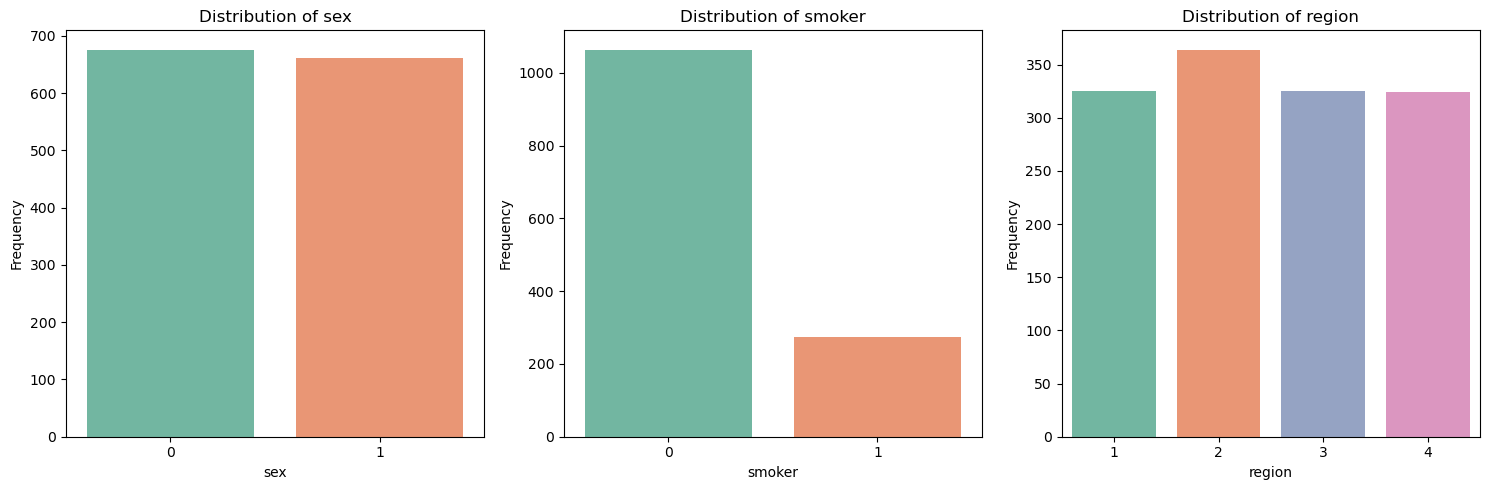

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplot grid
plt.figure(figsize=(15, 5))

# Loop through each categorical column
for i, col in enumerate(categorical_col, 1):
    plt.subplot(1, len(categorical_col), i)  # Adjust layout based on number of columns
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### How too interprete FRequency Distribution and Mode for Data Consistency:
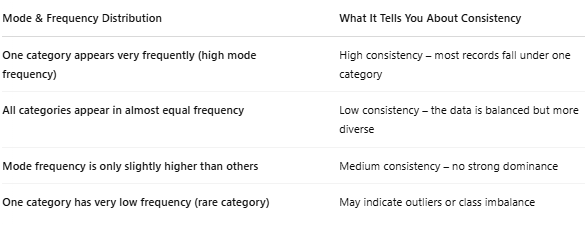

#### How Interpretation of Measure of Dispersion for Data Consistency for Numerical features is different from  that of Categorical features
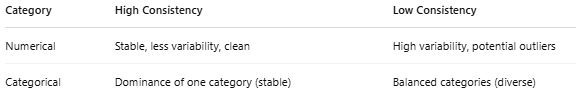

### III) Data Distrbution and Shape
-  How can Data Distribution and Shape can vsisually help us apply statistics to a given dataset and take informed decissions

### A) For Numerical (Quantitative Features) features :
Numerical data is continuous and can show a wide variety of central tendencies and spread measures, requiring more complex visualizations (e.g., histograms, box plots, density plots).

### Histograms 
- The relative positions of mean, median, and mode help you:

- Interpret the skewness or symmetry of the data.

- Understand data spread and outliers.

- Decide on data transformation (like log/box-cox) if needed.

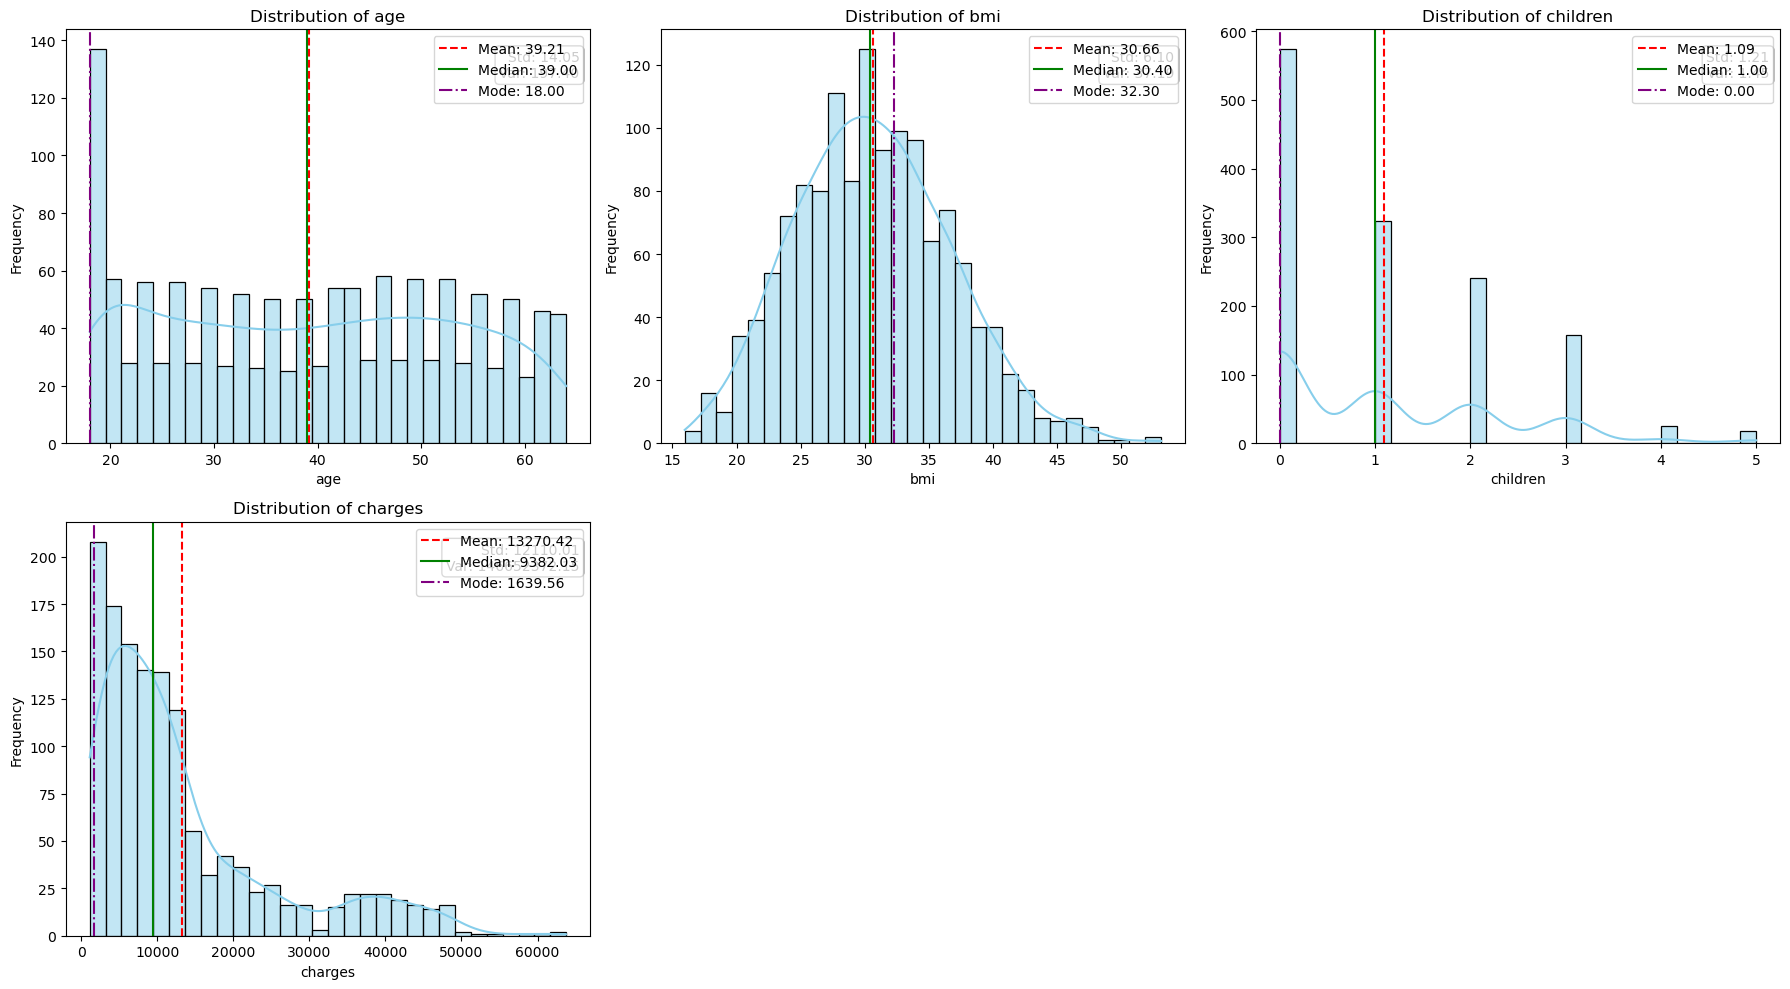

In [103]:
# Set up the subplot grid
num_cols = len(numeric_col)
n_rows = int(np.ceil(num_cols / 3))  # Adjust number of rows based on total columns
plt.figure(figsize=(18, 5 * n_rows))

# Loop through each numerical column
for i, col in enumerate(numeric_col, 1):
    plt.subplot(n_rows, 3, i)
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    
    # Calculate statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    std_val = df[col].std()
    var_val = df[col].var()
    
    # Draw lines for mean, median, mode
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='-.', label=f'Mode: {mode_val:.2f}')
    
    # Title and labels
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Show std and var in text box
    stats_text = f"Std: {std_val:.2f}\nVar: {var_val:.2f}"
    plt.text(0.98, 0.95, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))
    
    # Add legend
    plt.legend()

plt.tight_layout()
plt.show()

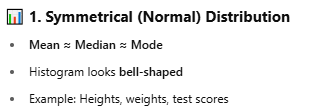 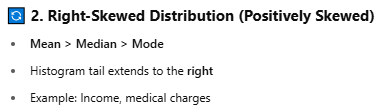 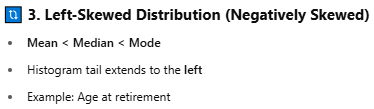

#### Box Plot
- Helps detect outliers.

- Reveals data skewness.

- Assesses central tendency.

- Understands spread/variability (range & IQR).

- Useful for comparing distributions across multiple features.

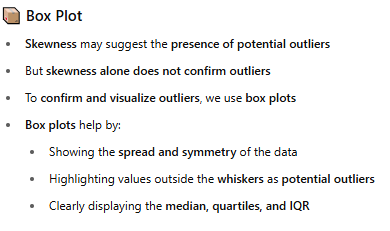

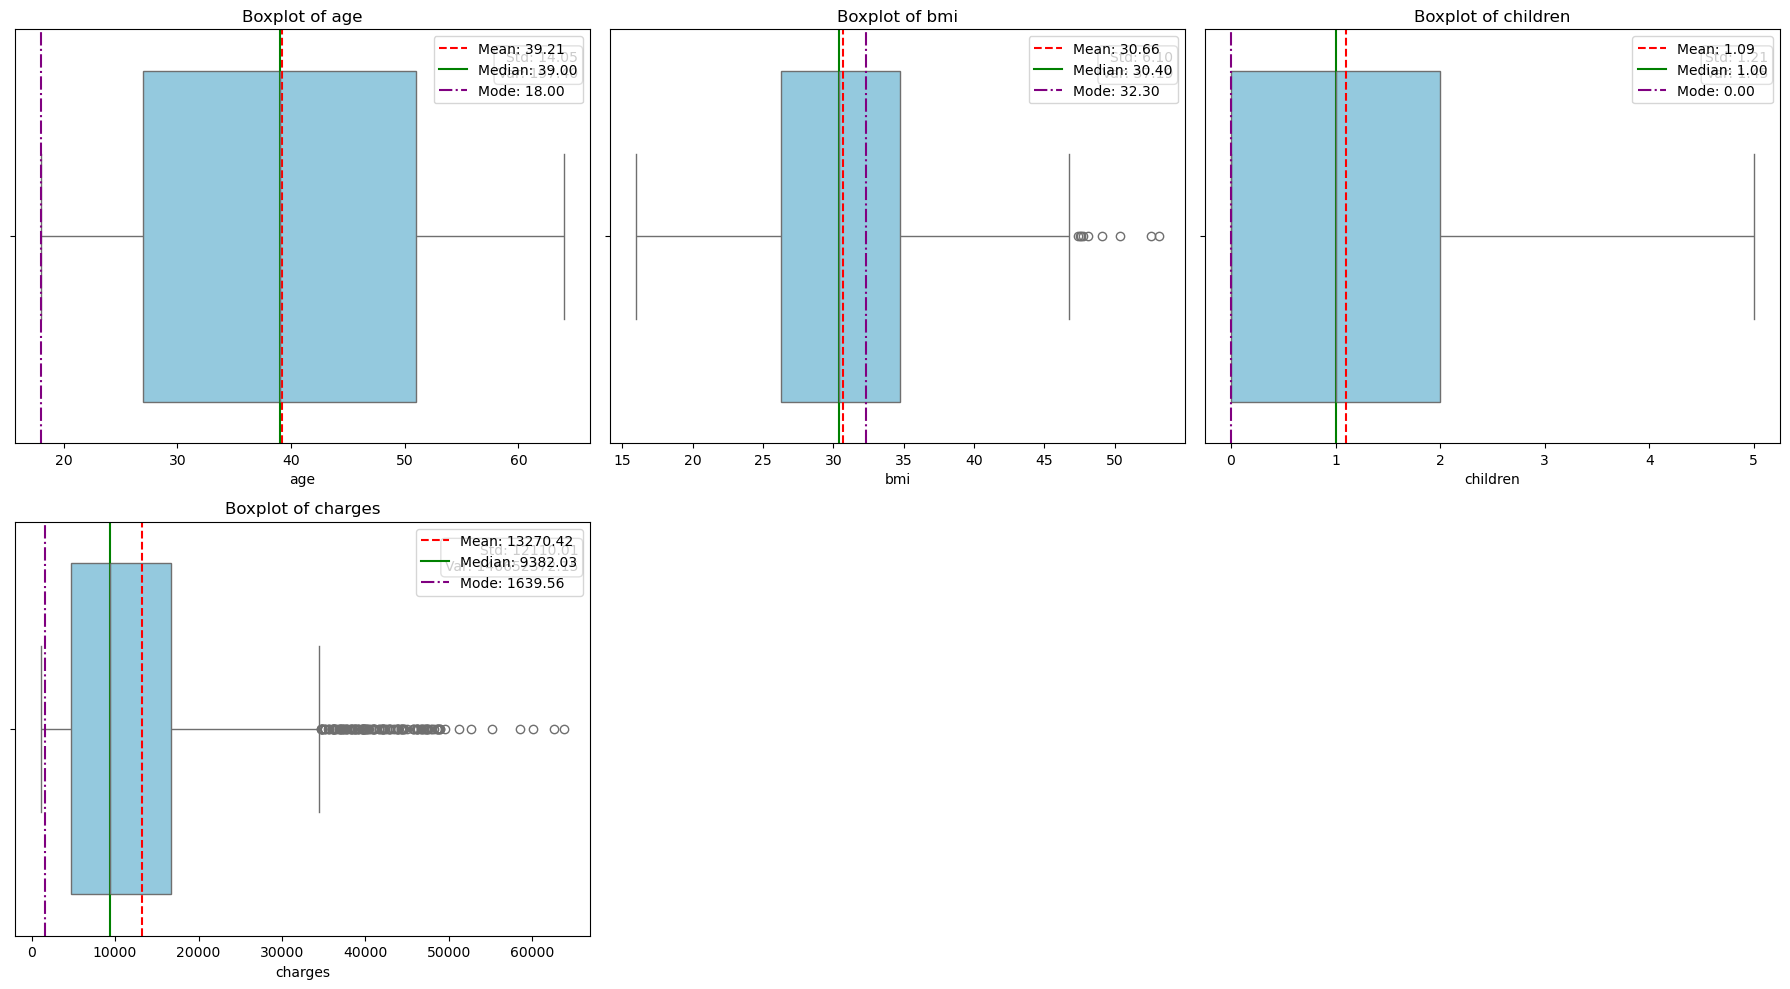

In [216]:
# Set up subplot grid
num_cols = len(numeric_col)
n_rows = int(np.ceil(num_cols / 3))  # 3 plots per row
plt.figure(figsize=(18, 5 * n_rows))

# Loop through each numerical feature
for i, col in enumerate(numeric_col, 1):
    plt.subplot(n_rows, 3, i)
    
    # Boxplot
    sns.boxplot(x=df[col], color='skyblue')
    
    # Calculate statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    std_val = df[col].std()
    var_val = df[col].var()
    
    # Plot mean, median, and mode
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='-.', label=f'Mode: {mode_val:.2f}')
    
    # Add title and labels
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col)
    
    # Display std and variance as text inside the plot
    stats_text = f"Std: {std_val:.2f}\nVar: {var_val:.2f}"
    plt.text(0.98, 0.95, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round", facecolor='white', alpha=0.6))
    
    plt.legend()

plt.tight_layout()
plt.show()


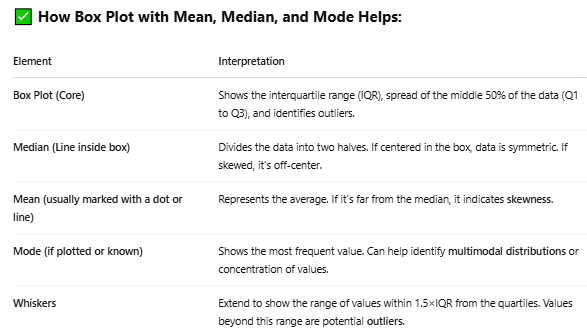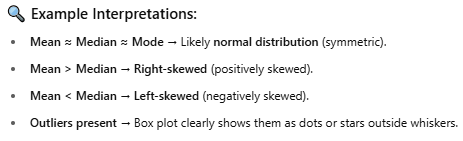

## B) For Categorical Featues:

### Bar Plots: How Bar Plots Help:
- Detect class imbalance

- Identify dominant or rare classes

- Spot data entry issues (e.g., duplicate labels with different spellings)

- Understand whether encoding or grouping is needed

C:\Users\bhosa\AppData\Local\Temp\ipykernel_3140\2887610073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
C:\Users\bhosa\AppData\Local\Temp\ipykernel_3140\2887610073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
C:\Users\bhosa\AppData\Local\Temp\ipykernel_3140\2887610073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


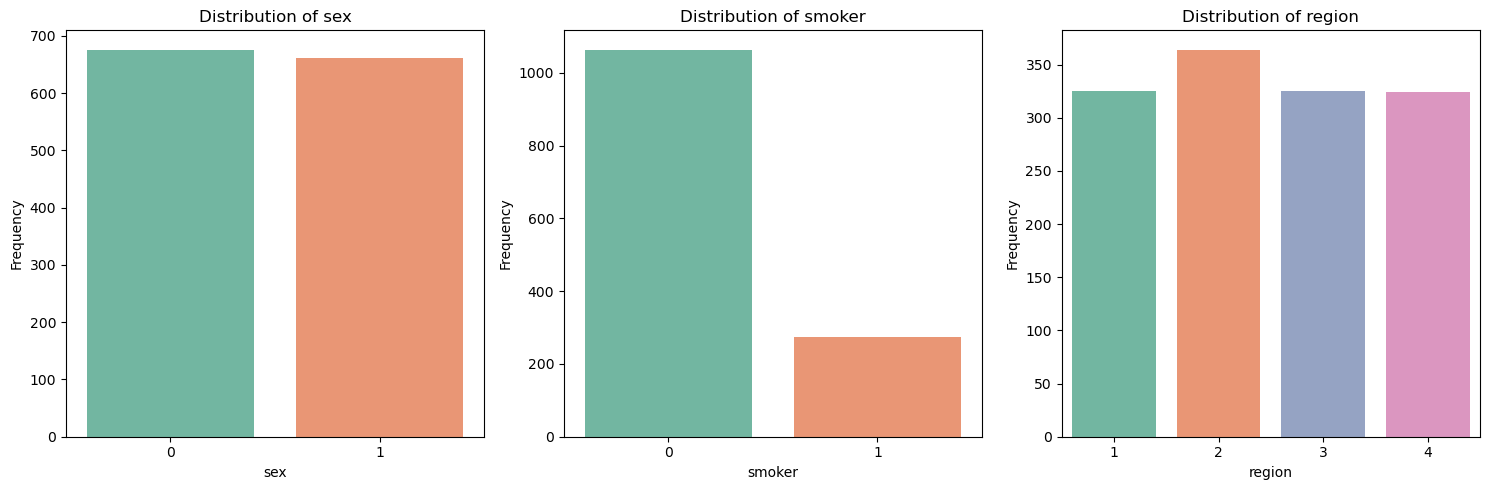

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplot grid
plt.figure(figsize=(15, 5))

# Loop through each categorical column
for i, col in enumerate(categorical_col, 1):
    plt.subplot(1, len(categorical_col), i)  # Adjust layout based on number of columns
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


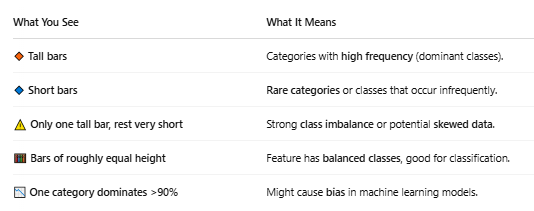